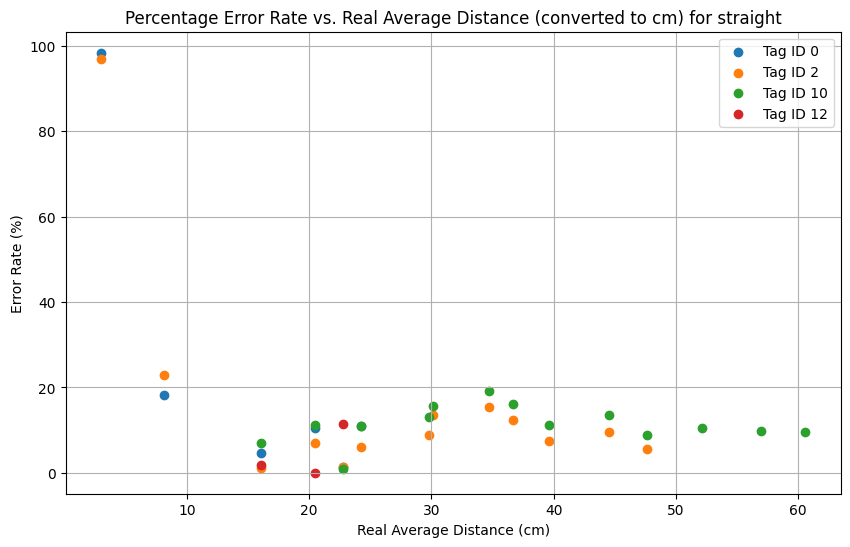

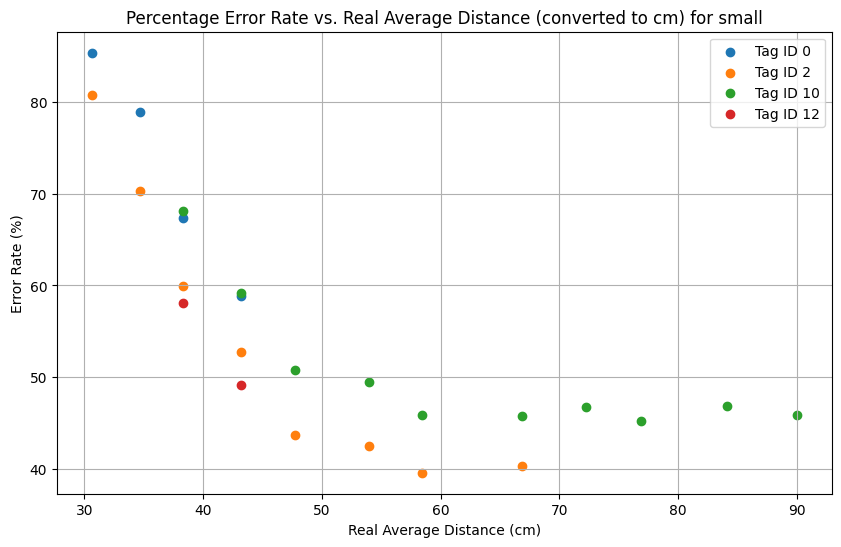

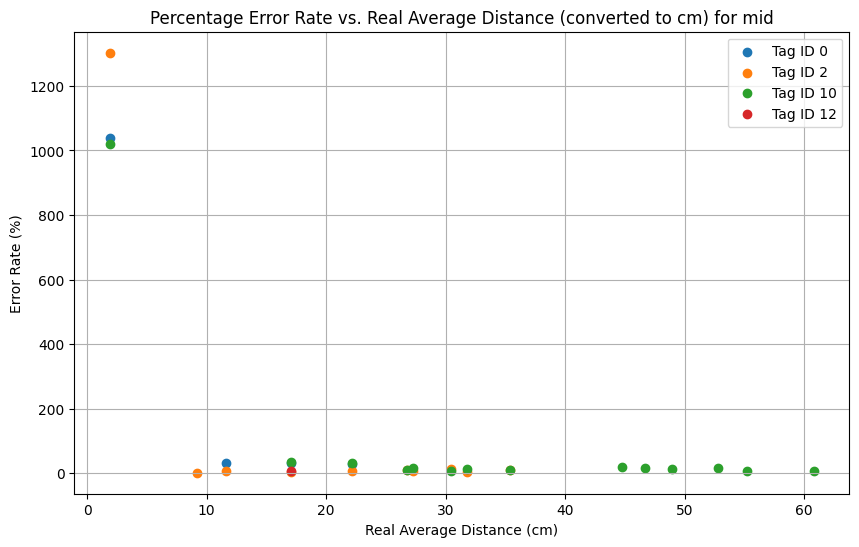

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
calculated_data = pd.read_csv('4.25_calculated.csv')
straight_distances = pd.read_csv('straight_angle_real_average_distances_425.csv')
small_distances = pd.read_csv('small_angle_real_average_distances_425.csv')
mid_distances = pd.read_csv('mid_angle_real_average_distances_425.csv')

# Extract the numeric identifiers from filenames for mapping
straight_distances['Test ID'] = straight_distances['File Name'].str.extract('(\d+)').astype(int)
small_distances['Test ID'] = small_distances['File Name'].str.extract('(\d+)').astype(int)
mid_distances['Test ID'] = mid_distances['File Name'].str.extract('(\d+)').astype(int)

# Add a condition column to the real distance dataframes for easy merging and filtering
straight_distances['Condition'] = 'straight'
small_distances['Condition'] = 'small'
mid_distances['Condition'] = 'mid'

# Extract Test ID and condition from 'Subfolder' in calculated_data
calculated_data['Test ID'] = calculated_data['Subfolder'].str.extract('(\d+)').astype(int)
calculated_data['Condition'] = calculated_data['Subfolder'].str.extract('([a-zA-Z]+)')[0].map({'s': 'straight', 'sm': 'small', 'm': 'mid'})

# Merge the real distances into calculated_data on Test ID and condition
merged_data = pd.merge(calculated_data, pd.concat([straight_distances, small_distances, mid_distances]), on=['Test ID', 'Condition'], suffixes=('_calc', '_real'))

# Convert calculated distances from centimeters to meters for comparison
merged_data['Average Distance (cm)'] /= 100

# Calculate the error rate as the absolute percentage difference between real and calculated average distances
merged_data['Error Rate (%)'] = abs((merged_data['Average Distance'] - merged_data['Average Distance (cm)']) / merged_data['Average Distance']) * 100

# Function to plot data for a given condition
def plot_condition_data(condition_data, condition_name):
    plt.figure(figsize=(10, 6))
    tag_ids = condition_data['Tag ID'].unique()[:4]  # Select up to four Tag IDs
    for tag_id in tag_ids:
        tag_data = condition_data[condition_data['Tag ID'] == tag_id]
        plt.scatter(tag_data['Average Distance'] * 100, tag_data['Error Rate (%)'], label=f'Tag ID {tag_id}')  # Convert real distance to cm for x-axis
    
    plt.title(f'Percentage Error Rate vs. Real Average Distance (converted to cm) for {condition_name}')
    plt.xlabel('Real Average Distance (cm)')
    plt.ylabel('Error Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot data for each condition
conditions = ['straight', 'small', 'mid']
for condition in conditions:
    condition_data = merged_data[merged_data['Condition'] == condition]
    plot_condition_data(condition_data, condition)


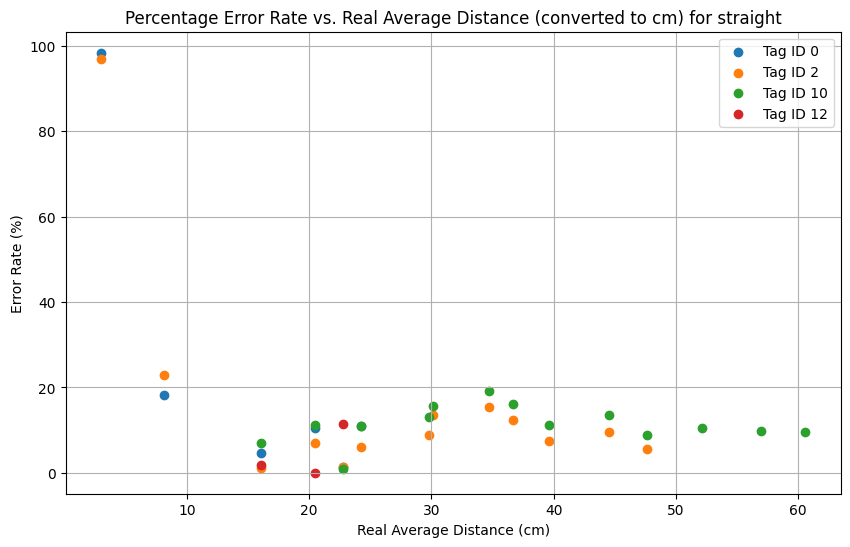

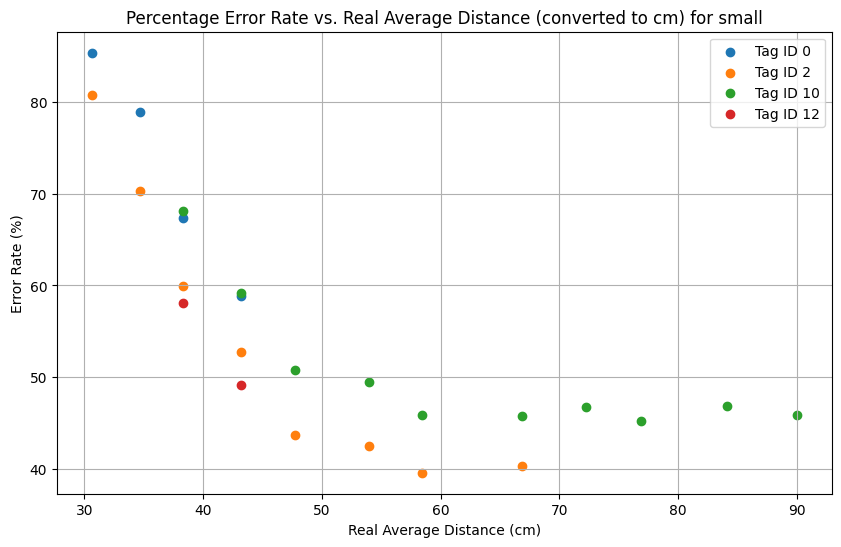

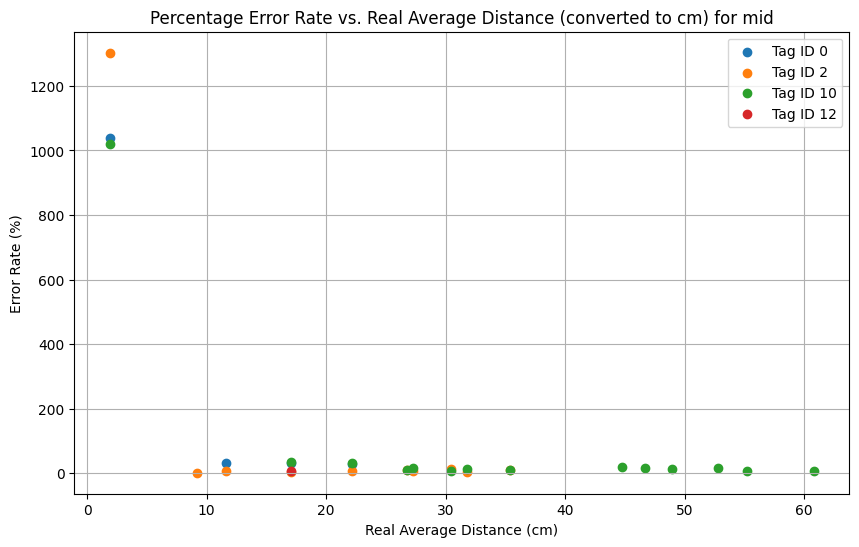

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
calculated_data = pd.read_csv('4.25_calculated.csv')
straight_distances = pd.read_csv('straight_angle_real_average_distances_425.csv')
small_distances = pd.read_csv('small_angle_real_average_distances_425.csv')
mid_distances = pd.read_csv('mid_angle_real_average_distances_425.csv')

# Extract the numeric identifiers from filenames for mapping
straight_distances['Test ID'] = straight_distances['File Name'].str.extract('(\d+)').astype(int)
small_distances['Test ID'] = small_distances['File Name'].str.extract('(\d+)').astype(int)
mid_distances['Test ID'] = mid_distances['File Name'].str.extract('(\d+)').astype(int)

# Add a condition column to the real distance dataframes for easy merging and filtering
straight_distances['Condition'] = 'straight'
small_distances['Condition'] = 'small'
mid_distances['Condition'] = 'mid'

# Extract Test ID and condition from 'Subfolder' in calculated_data
calculated_data['Test ID'] = calculated_data['Subfolder'].str.extract('(\d+)').astype(int)
calculated_data['Condition'] = calculated_data['Subfolder'].str.extract('([a-zA-Z]+)')[0].map({'s': 'straight', 'sm': 'small', 'm': 'mid'})

# Merge the real distances into calculated_data on Test ID and condition
merged_data = pd.merge(calculated_data, pd.concat([straight_distances, small_distances, mid_distances]), on=['Test ID', 'Condition'], suffixes=('_calc', '_real'))

# Convert calculated distances from centimeters to meters for comparison
merged_data['Average Distance (cm)'] /= 100

# Calculate the error rate as the absolute percentage difference between real and calculated average distances
merged_data['Error Rate (%)'] = abs((merged_data['Average Distance'] - merged_data['Average Distance (cm)']) / merged_data['Average Distance']) * 100

# Function to plot data for a given condition
def plot_condition_data(condition_data, condition_name):
    plt.figure(figsize=(10, 6))
    tag_ids = condition_data['Tag ID'].unique()[:4]  # Select up to four Tag IDs
    for tag_id in tag_ids:
        tag_data = condition_data[condition_data['Tag ID'] == tag_id]
        plt.scatter(tag_data['Average Distance'] * 100, tag_data['Error Rate (%)'], label=f'Tag ID {tag_id}')  # Convert real distance to cm for x-axis
    
    plt.title(f'Percentage Error Rate vs. Real Average Distance (converted to cm) for {condition_name}')
    plt.xlabel('Real Average Distance (cm)')
    plt.ylabel('Error Rate (%)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot data for each condition
conditions = ['straight', 'small', 'mid']
for condition in conditions:
    condition_data = merged_data[merged_data['Condition'] == condition]
    plot_condition_data(condition_data, condition)


In [21]:
# Adjusting the parser for real distances to handle the header properly
real_distances_file = 'log_real_425.txt'
def parse_real_distances_corrected(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    
    # Data storage structure
    distances = {}
    
    # Skip the first line assuming it's a header
    for line in data[1:]:  # Start from second line to avoid the header
        line = line.strip()
        if line:
            parts = line.split()
            # The format assumed is: category #filename.csv average_distance
            category = parts[0].strip()
            file_name = parts[1].strip()
            avg_distance = float(parts[2].strip())
            # Extract the subfolder and file id from the filename
            subfolder, file_id = file_name.split('_')
            file_id = file_id.replace('.csv', '')
            # Structure the distances by category, subfolder, and file id
            if category not in distances:
                distances[category] = {}
            if subfolder not in distances[category]:
                distances[category][subfolder] = {}
            distances[category][subfolder][file_id] = avg_distance
    
    return distances

# Parse the real distances again with the corrected method
real_distances_corrected = parse_real_distances_corrected(real_distances_file)
real_distances_corrected


{'mid_angle': {'#mid': {'018': 0.76,
   '024': 1.12,
   '004': 0.22,
   '005': 0.27,
   '021': 0.94,
   '016': 0.68,
   '011': 0.47,
   '012': 0.49,
   '002': 0.12,
   '028': 1.29,
   '022': 1.0,
   '032': 1.53,
   '010': 0.45,
   '020': 0.88,
   '023': 1.05,
   '019': 0.85,
   '025': 1.14,
   '003': 0.17,
   '027': 1.24,
   '029': 1.34,
   '013': 0.53,
   '007': 0.27,
   '009': 0.35,
   '017': 0.71,
   '030': 1.41,
   '006': 0.32,
   '000': 0.02,
   '008': 0.3,
   '015': 0.61,
   '031': 1.47,
   '001': 0.09,
   '026': 1.2,
   '014': 0.55}},
 'small_angle': {'#small': {'010': 0.54,
   '028': 1.69,
   '027': 1.63,
   '014': 0.77,
   '005': 0.31,
   '032': 1.94,
   '025': 1.56,
   '023': 1.37,
   '015': 0.84,
   '013': 0.72,
   '026': 1.57,
   '024': 1.48,
   '022': 1.32,
   '018': 1.03,
   '019': 1.12,
   '009': 0.48,
   '007': 0.38,
   '033': 1.96,
   '031': 1.89,
   '021': 1.28,
   '006': 0.35,
   '020': 1.2,
   '030': 1.84,
   '016': 0.9,
   '012': 0.67,
   '017': 0.97,
   '001': 0.0

In [24]:
# Function to display tag IDs from both datasets for comparison
def display_tag_ids(calculated, real, category_key, real_prefix, calc_prefixes):
    print(f"Real Data ({category_key}):")
    for real_subfolder, tags in real[category_key].items():
        print(f"  {real_subfolder}: Tags - {list(tags.keys())}")

    print(f"Calculated Data Matching {category_key}:")
    for calc_prefix in calc_prefixes:
        for calc_subfolder in calculated:
            if calc_subfolder.startswith(calc_prefix):
                print(f"  {calc_subfolder}: Tags - {list(calculated[calc_subfolder].keys())}")

# Example usage: Assuming 'straight_angle' corresponds to prefixes like 's', 'sm', 'm'
display_tag_ids(calculated_distances, real_distances_corrected, 'straight_angle', '#', ['s', 'sm', 'm'])
display_tag_ids(calculated_distances, real_distances_corrected, 'small_angle', '#', ['s', 'sm', 'm'])
display_tag_ids(calculated_distances, real_distances_corrected, 'mid_angle', '#', ['s', 'sm', 'm'])


Real Data (straight_angle):
  #straight: Tags - ['005', '007', '003', '015', '024', '020', '035', '009', '013', '021', '004', '029', '002', '010', '000', '016', '030', '034', '025', '033', '011', '028', '022', '018', '019', '012', '036', '027', '032', '008', '014', '023', '026', '006', '001', '017', '031']
Calculated Data Matching straight_angle:
  straight: Tags - ['s3', 's19', 's12', 's0', 's23', 's24', 's26', 's15', 's27', 's20', 's2', 's36', 's21', 's13', 's25', 's32', 's35', 's1', 's17', 's10', 's22', 's28', 's31', 's18', 's29', 's6', 's34', 's11', 's9', 's16', 's7', 's4', 's14', 's8', 's5', 's30', 's33']
  small: Tags - ['sm32', 'sm19', 'sm5', 'sm3', 'sm4', 'sm23', 'sm24', 'sm16', 'sm28', 'sm21', 'sm12', 'sm9', 'sm8', 'sm18', 'sm11', 'sm10', 'sm30', 'sm0', 'sm26', 'sm6', 'sm1', 'sm14', 'sm20', 'sm31', 'sm15', 'sm7', 'sm2', 'sm33', 'sm29', 'sm13', 'sm27', 'sm25', 'sm17', 'sm22']
  small: Tags - ['sm32', 'sm19', 'sm5', 'sm3', 'sm4', 'sm23', 'sm24', 'sm16', 'sm28', 'sm21', 'sm12', '

In [26]:
# Function to print detailed subfolder and tag information for inspection
def print_calculated_details(calculated):
    for category, subfolders in calculated.items():
        print(f"Category: {category}")
        for subfolder, tags in subfolders.items():
            print(f"  Subfolder: {subfolder}, Tags: {list(tags.keys())}")

# Function to try a simplified matching logic based on adjusted subfolder naming assumptions
def match_and_plot(calculated, real):
    plot_data = {'real_distances': [], 'error_rates': []}
    # Simplified mapping for subfolders based on possible naming patterns
    mapping = {
        'straight': 'straight_angle',
        'small': 'small_angle',
        'middle': 'mid_angle'  # Assuming 'middle' is mapped to 'mid_angle'
    }

    # Iterate over simplified mappings
    for calc_key, real_key in mapping.items():
        if real_key in real:
            for real_subfolder, tags in real[real_key].items():
                for calc_subfolder, calc_tags in calculated.items():
                    if calc_key in calc_subfolder:  # Match based on simple inclusion logic
                        for tag_id, real_dist in tags.items():
                            if tag_id in calc_tags:
                                calc_dist = calc_tags[tag_id] / 100  # Convert cm to meters
                                error_rate = ((calc_dist - real_dist) / real_dist) * 100
                                plot_data['real_distances'].append(real_dist)
                                plot_data['error_rates'].append(error_rate)

    # Plotting
    if plot_data['real_distances']:
        plt.figure(figsize=(10, 6))
        plt.scatter(plot_data['real_distances'], plot_data['error_rates'], color='blue')
        plt.title('Error Rates Across Mapped Categories')
        plt.xlabel('Real Distance (m)')
        plt.ylabel('Error Rate (%)')
        plt.grid(True)
        plt.show()
    else:
        print("No matching data points found for plotting.")

# Display calculated dataset details
print_calculated_details(calculated_distances)

# Try matching and plotting based on new logic
match_and_plot(calculated_distances, real_distances_corrected)


Category: straight
  Subfolder: s3, Tags: ['0', '2', '10', '12']
  Subfolder: s19, Tags: []
  Subfolder: s12, Tags: ['2', '10']
  Subfolder: s0, Tags: ['0', '2']
  Subfolder: s23, Tags: []
  Subfolder: s24, Tags: []
  Subfolder: s26, Tags: []
  Subfolder: s15, Tags: ['10']
  Subfolder: s27, Tags: []
  Subfolder: s20, Tags: []
  Subfolder: s2, Tags: ['0', '2', '10', '12']
  Subfolder: s36, Tags: []
  Subfolder: s21, Tags: []
  Subfolder: s13, Tags: ['10']
  Subfolder: s25, Tags: []
  Subfolder: s32, Tags: []
  Subfolder: s35, Tags: []
  Subfolder: s1, Tags: ['0', '2']
  Subfolder: s17, Tags: []
  Subfolder: s10, Tags: ['2', '10']
  Subfolder: s22, Tags: []
  Subfolder: s28, Tags: []
  Subfolder: s31, Tags: []
  Subfolder: s18, Tags: []
  Subfolder: s29, Tags: []
  Subfolder: s6, Tags: ['0', '2', '10', '12']
  Subfolder: s34, Tags: []
  Subfolder: s11, Tags: ['2', '10']
  Subfolder: s9, Tags: ['2', '10']
  Subfolder: s16, Tags: []
  Subfolder: s7, Tags: ['0', '2', '10']
  Subfolder: s4, 